<a href="https://colab.research.google.com/github/kimbaorrr/colab_exercises/blob/main/KPDLUD/KPDLUD_GiuaKi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import thư viện**

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error

#**Import dữ liệu & trực quan hóa**

In [ ]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.sample(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4307,53219,Male,47.0,0,0,Yes,Private,Urban,63.98,26.8,smokes,0
934,6988,Female,52.0,0,0,Yes,Self-employed,Urban,113.21,38.3,never smoked,0
767,62382,Male,82.0,0,0,Yes,Private,Urban,105.77,29.5,Unknown,0
2534,4174,Female,45.0,1,0,Yes,Private,Urban,93.21,43.8,never smoked,0
4955,61376,Male,38.0,0,0,Yes,Private,Urban,215.69,38.6,formerly smoked,0
1161,47414,Female,71.0,1,0,Yes,Private,Urban,116.76,32.9,formerly smoked,0
126,3352,Male,78.0,1,0,Yes,Self-employed,Urban,93.13,NaN,formerly smoked,1
218,25904,Female,76.0,1,1,Yes,Self-employed,Urban,199.86,NaN,smokes,1
4652,21796,Male,59.0,0,0,Yes,Private,Urban,66.46,39.6,formerly smoked,0
242,45535,Male,68.0,0,0,Yes,Private,Rural,233.94,42.4,never smoked,1


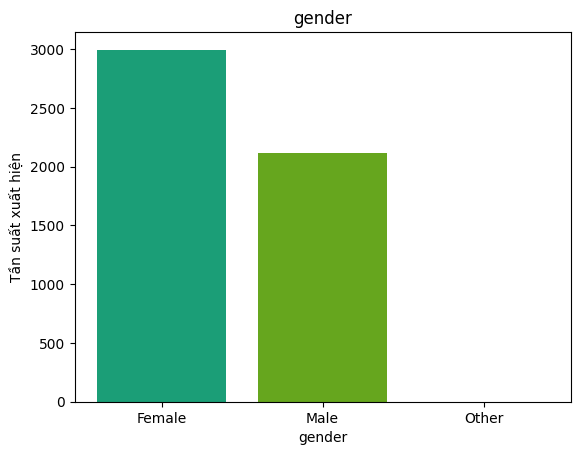

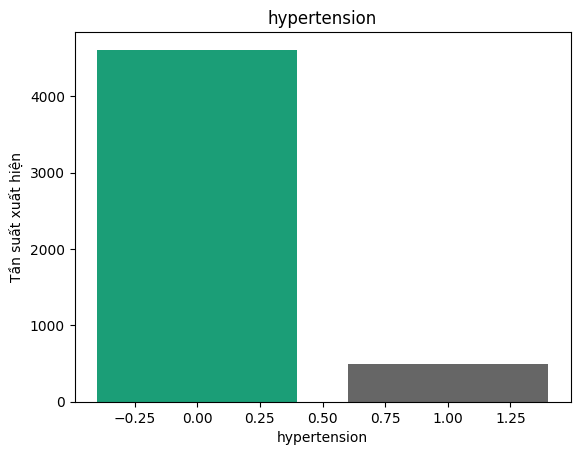

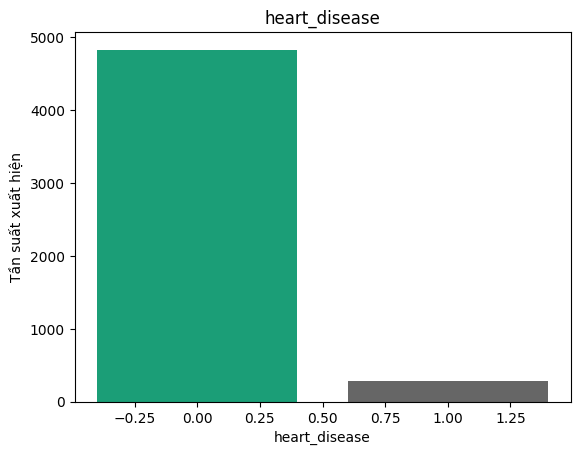

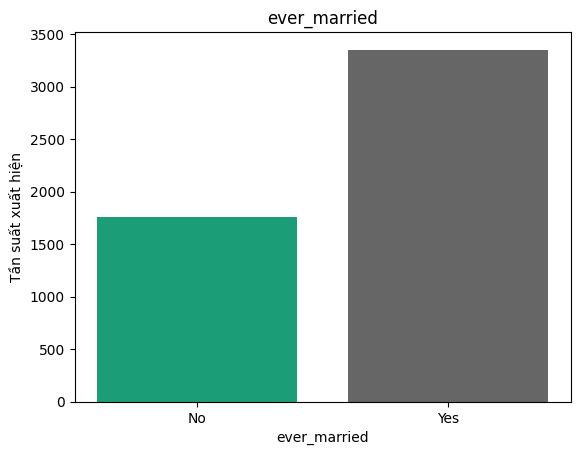

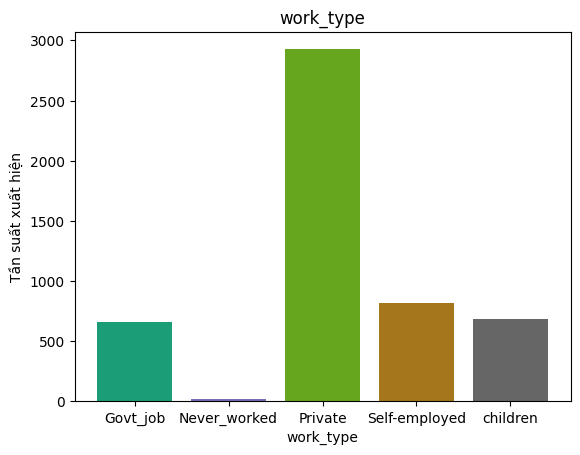

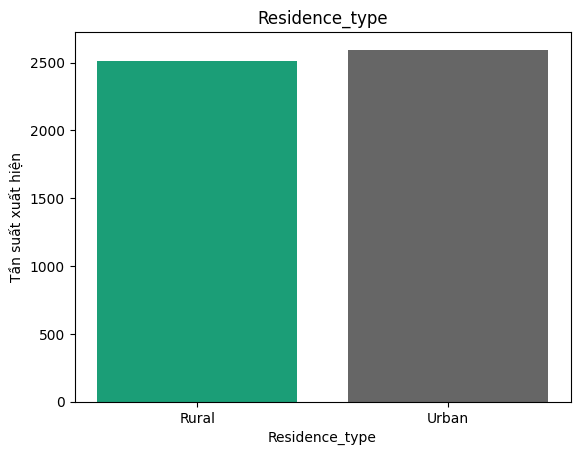

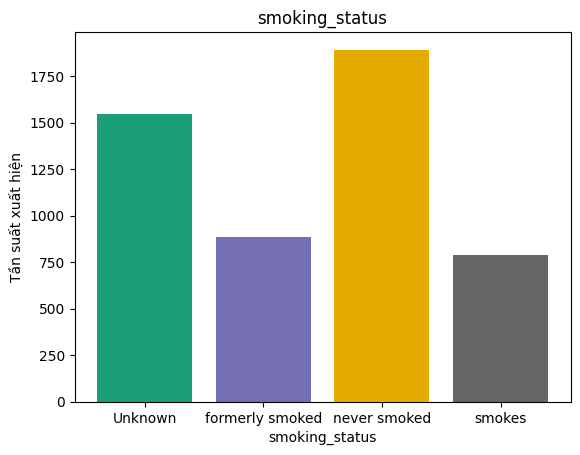

In [ ]:
df_categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for column in df_categorical:
    values, counts = np.unique(df[column], return_counts=True)
    colors = plt.cm.Dark2(np.linspace(0, 1, len(values)))
    plt.bar(values, counts, color=colors)
    plt.title(f'{column}')
    plt.xlabel(column)
    plt.ylabel('Tần suất xuất hiện')
    plt.savefig(f'/content/chart_of_{column}.jpg')
    plt.show()

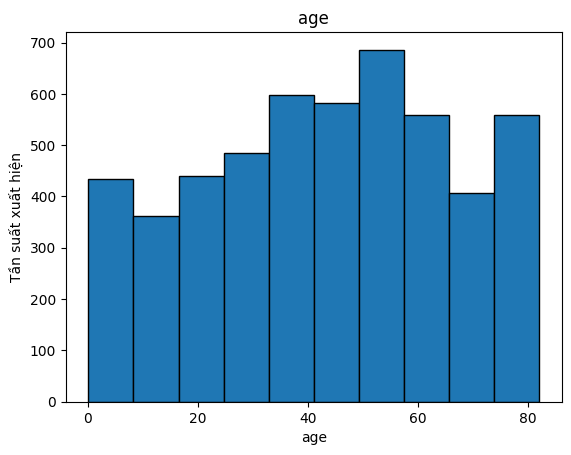

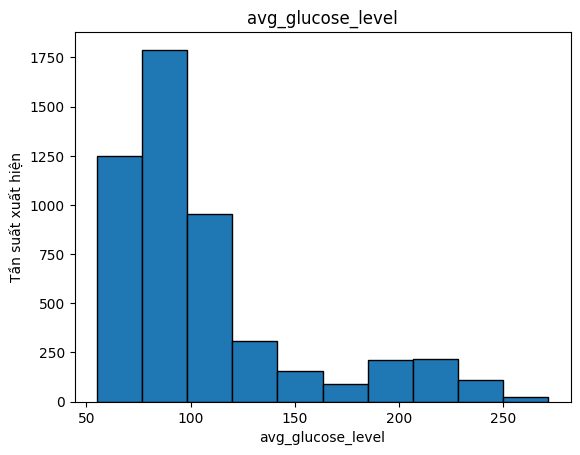

In [ ]:
df_numerical2 = ['age', 'avg_glucose_level']

for column in df_numerical2:
    plt.hist(df[column], edgecolor='black')
    plt.title(f'{column}')
    plt.xlabel(column)
    plt.ylabel('Tần suất xuất hiện')
    plt.savefig(f'/content/chart_of_{column}.jpg')
    plt.show()

#**Tiền xử lý dữ liệu**

In [ ]:
# Tiền xử lý dữ liệu
print('Đếm các giá trị NULL của từng thuộc tính')
print(df.isna().sum())
print('Đếm số dòng trùng lặp')
print(f'=> Có {df.duplicated().sum()} dòng bị trùng lặp !')
print('Các phần tử ngoại lai')
df.describe()

Đếm các giá trị NULL của từng thuộc tính
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64
Đếm số dòng trùng lặp
=> Có 0 dòng bị trùng lặp !
Các phần tử ngoại lai


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
# Xóa giá trị NULL
df.dropna(inplace=True)
print('Kiểm tra lại giá trị NULL của từng thuộc tính')
print(df.isna().sum())

Kiểm tra lại giá trị NULL của từng thuộc tính
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


#**Mapping dữ liệu**

In [ ]:
# Mapping dữ liệu
object_cols = df.select_dtypes(include=['object']).columns
df[object_cols] = df[object_cols].apply(lambda x: x.str.lower())

gender_mapping = {'male': 0, 'female': 1}
ever_married_mapping = {'no': 0, 'yes': 1}
work_type_mapping = {'never_worked': 0, 'govt_job': 1, 'self-employed': 2, 'children' : 3, 'private' : 4}
Residence_type_mapping = {'rural': 0, 'urban': 1}
smoking_status_mapping = {'smokes': 0, 'formerly smoked': 1, 'unknown': 2, 'never smoked' : 3}

df['gender'] = df['gender'].map(gender_mapping)
df['ever_married'] = df['ever_married'].map(ever_married_mapping)
df['work_type'] = df['work_type'].map(work_type_mapping)
df['Residence_type'] = df['Residence_type'].map(Residence_type_mapping)
df['smoking_status'] = df['smoking_status'].map(smoking_status_mapping)

In [ ]:
df.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
985,46385,1.0,21.0,0,0,1,4,1,59.15,22.6,3,0
3469,62306,1.0,69.0,1,0,1,2,1,111.81,26.1,1,0
3827,45565,1.0,40.0,0,0,1,4,1,72.12,38.0,3,0
1852,28913,0.0,78.0,0,0,1,4,0,100.09,30.5,2,0
4289,21407,0.0,39.0,0,0,1,4,0,117.03,40.3,1,0


In [ ]:
df.dropna(inplace=True)

#**Tách tập dữ liệu**

In [ ]:
# Tách tập dữ liệu Train/Test 80:20
x = df.drop(columns=['id', 'stroke'])
y = df['stroke']
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=.20,
    random_state=50
)

In [ ]:
# Thống kê số phần tử có trong 2 tập TRAIN/TEST
print(f'TRAIN: {x_train.shape[0]} dòng dữ liệu !')
print(f'TEST: {x_test.shape[0]} dòng dữ liệu !')

TRAIN: 3926 dòng dữ liệu !
TEST: 982 dòng dữ liệu !


#**Xây dựng mô hình**

In [ ]:
model = LogisticRegression(random_state=50, verbose=10, max_iter=1000)

model.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.8s


LogisticRegression(max_iter=1000, random_state=50, verbose=10)

#**Đánh giá mô hình**

Accuracy: 0.9562118126272913
MSE: 0.04378818737270876
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       940
           1       0.00      0.00      0.00        42

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.96      0.94       982



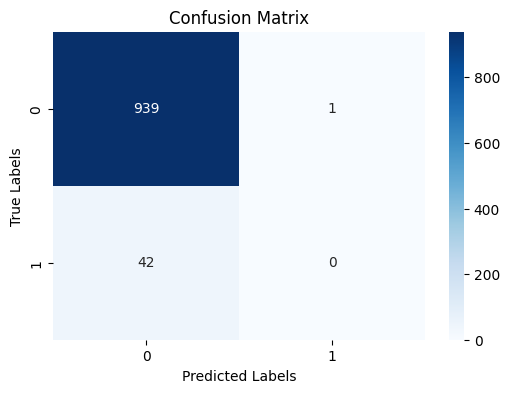

In [ ]:
# Dự đoán trên dữ liệu kiểm thử
y_pred = model.predict(x_test)

# Tính toán ma trận nhầm lẫn
confusion = confusion_matrix(y_test, y_pred)

# Tính toán độ chính xác
accuracy = accuracy_score(y_test, y_pred)

# Tính toán tỉ lệ lỗi
mse = mean_squared_error(y_test, y_pred)

# In độ chính xác và báo cáo phân loại
print("Accuracy:",accuracy)
print("MSE:",mse)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Tạo biểu đồ ma trận nhầm lẫn
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig('/content/matrix.jpg')
plt.show()